In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1J5PMkQgLY5OAh9igr_lfO7uU2mUVslni/view?usp=share_link'

import pandas as pd

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('r42pasado.csv')

df = pd.read_csv('r42pasado.csv')
DT_Richest= pd.DataFrame(df)

In [ ]:


DT_Richest["NetWorth"]=DT_Richest["NetWorth"].replace('\$','', regex=True)
DT_Richest["NetWorth"]=DT_Richest["NetWorth"].replace(',','', regex=True)
DT_Richest["NetWorth"]=DT_Richest["NetWorth"].astype(float)



#DT_Richest.head(5)
DT_Richest.dtypes
DT_Richest.shape



(101, 8)

1. Industrias con personas más ricas

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

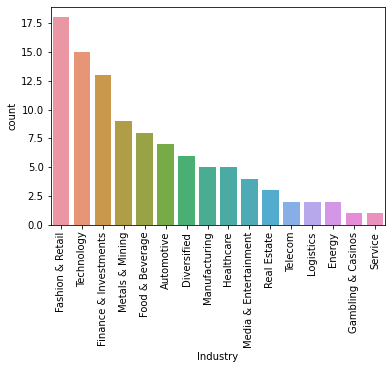

In [ ]:
#Industria=DT_Richest.pivot_table('NetWorth','Industry')
#Industria=Industria.reindex(Industria.sort_values(by='NetWorth',ascending=False).index)
#Industria

sns.countplot(DT_Richest['Industry'], order=df["Industry"].value_counts().index)
plt.xticks(rotation=90)


2. Rango de edad con personas más ricas

In [ ]:
DT_Richest['Age Category'] = '40+ years'
DT_Richest.loc[ DT_Richest['Age'] <40, 'Age Category']= '<40 years old'
DT_Richest.loc[ DT_Richest['Age'] <40]
#print(DT_Richest)

In [ ]:
conditions = [
    (df['Age'] < 30),
    (df['Age'] >= 30) & (df['Age'] < 40),
    (df['Age'] >= 40) & (df['Age'] < 60),
    (df['Age'] >= 60)
]

values = ['<30 years old', '30-39 years old', '40-59 years old', '60+ years old']

DT_Richest['Age_Category']=np.select(conditions, values)

#Chequear si Naa
#check_nan = DT_Richest['Age_Category'].isnull().values.any()
#print(check_nan)

#DT_Richest.groupby(['Age_Category'])['NetWorth'].sum()

DT2=(
    DT_Richest
     .groupby('Age_Category')
     .agg(NetWorth2=('NetWorth','count'))
     .sort_values('NetWorth2',ascending=False)
)
DT2

,NetWorth2
Age_Category,
60+ years old,68
40-59 years old,30
30-39 years old,3


In [ ]:
DT_Richest

,Name,NetWorth,Age,Country/Territory,Source,Industry,Age Category,Age_Category
0,Elon Musk,2.190000e+11,50,United States,"Tesla, SpaceX",Automotive,40+ years,40-59 years old
1,Jeff Bezos,1.710000e+11,58,United States,Amazon,Technology,40+ years,40-59 years old
2,Bernard Arnault & family,1.580000e+11,73,France,LVMH,Fashion & Retail,40+ years,60+ years old
3,Bill Gates,1.290000e+11,66,United States,Microsoft,Technology,40+ years,60+ years old
4,Warren Buffett,1.180000e+11,91,United States,Berkshire Hathaway,Finance & Investments,40+ years,60+ years old
...,...,...,...,...,...,...,...,...
96,Vladimir Potanin,1.730000e+10,61,Russia,metals,Metals & Mining,40+ years,60+ years old
97,Harold Hamm & family,1.720000e+10,76,United States,oil & gas,Energy,40+ years,60+ years old
98,Sun Piaoyang,1.710000e+10,63,China,pharmaceuticals,Healthcare,40+ years,60+ years old
99,Luo Liguo & family,1.700000e+10,66,China,chemicals,Manufacturing,40+ years,60+ years old


3. Promedio de Networth por país en orden descendente

In [ ]:
pais=DT_Richest.pivot_table('NetWorth','Country/Territory')
pais = pais.reindex(pais.sort_values(by='NetWorth',ascending=False).index)
pais

,NetWorth
Country/Territory,
Spain,5.960000e+10
United States,5.758108e+10
France,5.721429e+10
Canada,5.710000e+10
Mexico,5.600000e+10
India,4.132857e+10
Hong Kong,3.230000e+10
Italy,3.175000e+10
Germany,2.912857e+10
